# Nuvem de palavras das propostas dos candidatos a prefeito de Feira de Santana

Os candidatos a prefeito das cidades precisam submeter uma proposta
de governo. Os links para as propostas estão disponíveis no portal
[DivulgaCandContas](https://divulgacandcontas.tse.jus.br/) do TSE.

Através de uma iniciativa colaborativa, coletamos os links e extraímos
o texto das propostas. Veja mais sobre isso no [Dados de planos de governo de candidatos às prefeituras dos municípios em 2020](https://dadosabertos.social/t/dados-de-planos-de-governo-de-candidatos-as-prefeituras-dos-municipios-em-2020/645/1). Extraia o arquivo [`propostas.7z`](https://github.com/augusto-herrmann/eleicoes-2020-planos-de-governo/tree/main/dados) na pasta `notebooks`.
A pasta extraída deve seguir o padrão `propostas > <estados>`

Nessa análise vamos visualizar uma nuvem de palavras das propostas a
candidatos de todo o Brasil.

## Juntando todas as propostas

O _dataset_ de propostas está separado por estado e cidade.
Cada candidato tem um arquivo `.txt` com a sua proposta.

Vamos ler esses arquivos para limpá-los e juntá-los mais a frente.

In [1]:
import os


def get_all_proposals(directory):
    for root, _, files in os.walk(directory):
        if files:
            for file_ in files:
                yield open(f"{root}/{file_}").read()

In [10]:
proposals = get_all_proposals("propostas/")

## Limpeza do texto

In [3]:
import nltk
import spacy
from nltk.tokenize import word_tokenize

try:
    # se não tiver na máquina faz o download
    import pt_core_news_sm  # noqa
except:  # noqa
    from spacy.cli.download import download as spacy_download

    spacy_download("pt_core_news_sm")
nltk.download("punkt")
sp = spacy.load("pt_core_news_sm")


def remove_portuguese_stopwords(text, custom_stopwords=None):
    text = text.lower()
    all_stopwords = sp.Defaults.stop_words
    abc = [char for char in "abcdefghijklmnopqrstuvxyzw"]
    if not custom_stopwords:
        custom_stopwords = []
    aditional_stopwords = list(all_stopwords) + abc + custom_stopwords

    text_tokens = word_tokenize(text)
    return " ".join([word for word in text_tokens if word not in aditional_stopwords])

[nltk_data] Downloading package punkt to /home/ana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import pandas as pd
import texthero as hero
from texthero import preprocessing


custom_pipeline = [preprocessing.remove_digits,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_whitespace]

text = " ".join(proposals)
cleaned_text = remove_portuguese_stopwords(text)
cleaned_text = pd.Series(cleaned_text)
cleaned_text = hero.clean(cleaned_text, custom_pipeline)

In [16]:
cleaned_text = " ".join(cleaned_text)

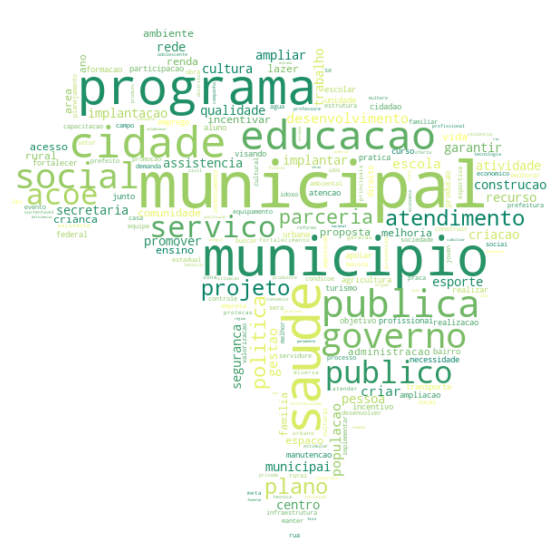

In [18]:
import cv2
from wordcloud import WordCloud
import matplotlib.pyplot as plt


imagem = cv2.imread("images/mapa-brasil.png")
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

wordcloud = WordCloud(
    background_color="white", width=2000, height=800, mask=mask, collocations=False, colormap="summer"
).generate(cleaned_text)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig(f"propostas-candidatos-prefeito-brasil.png", dpi=fig.dpi)
plt.show()